Generating moon dataset...
Dataset shapes:
X_train: (800, 2), y_train: (800, 2)
X_test: (200, 2), y_test: (200, 2)

Training MLP with default parameters (Batch Gradient Descent)...
Using provided dataset...
Using Batch Gradient Descent (full dataset)
Training samples: 800, Batches per epoch: 1
Starting training...
Step    0: Train Loss = 0.6922, Test Loss = 0.6918, Train Acc = 57.75%, Test Acc = 57.00%
Step   10: Train Loss = 0.6895, Test Loss = 0.6895, Train Acc = 84.38%, Test Acc = 84.00%
Step   20: Train Loss = 0.6869, Test Loss = 0.6872, Train Acc = 80.00%, Test Acc = 74.00%
Step   30: Train Loss = 0.6842, Test Loss = 0.6847, Train Acc = 79.12%, Test Acc = 73.50%
Step   40: Train Loss = 0.6814, Test Loss = 0.6822, Train Acc = 78.62%, Test Acc = 73.50%
Step   50: Train Loss = 0.6786, Test Loss = 0.6797, Train Acc = 78.50%, Test Acc = 73.00%
Step   60: Train Loss = 0.6756, Test Loss = 0.6770, Train Acc = 78.88%, Test Acc = 73.00%
Step   70: Train Loss = 0.6727, Test Loss = 0.6743, Tr

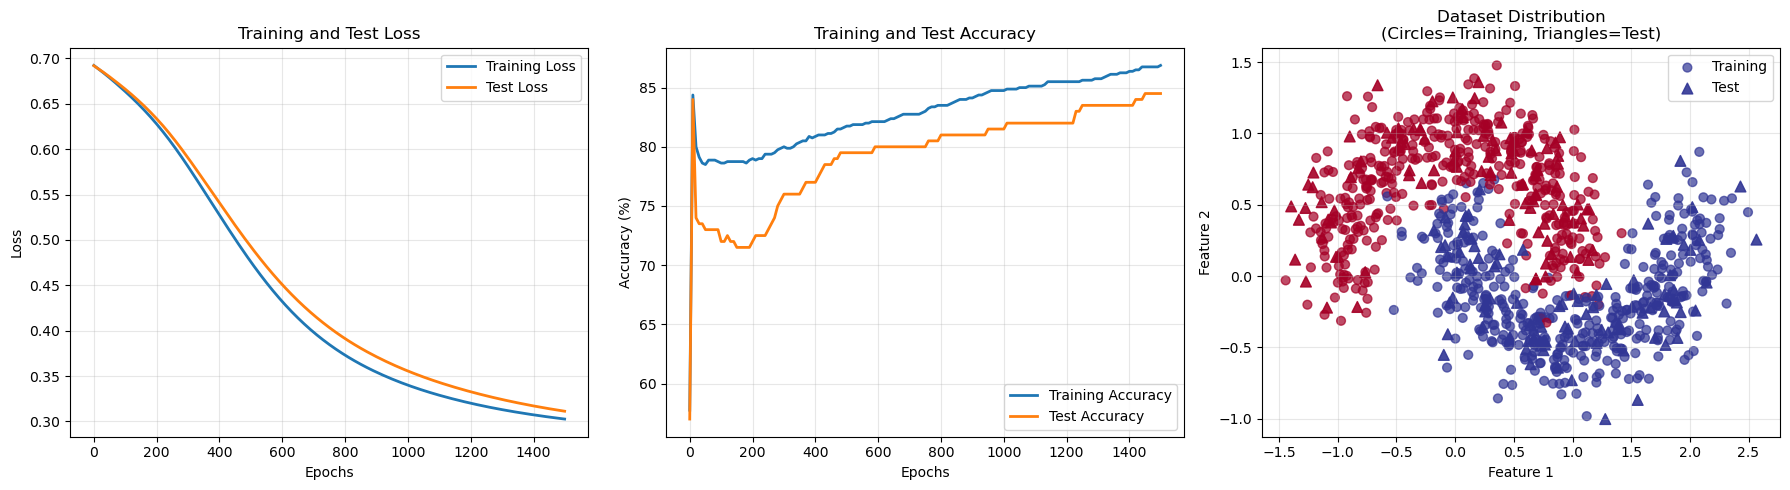

Dataset Composition:
- Total: 1000 samples
- Training: 800 samples (80.0%)
- Test: 200 samples (20.0%)

FINAL RESULTS (Batch Gradient Descent)
Final Training Accuracy: 86.88%
Final Test Accuracy: 84.50%
Final Training Loss: 0.3027
Final Test Loss: 0.3113

=== Experiment 2: Batch Gradient Descent vs Mini-Batch vs Stochastic Gradient Descent ===

Training with batch_size = full
Using provided dataset...
Using Batch Gradient Descent (full dataset)
Training samples: 800, Batches per epoch: 1
Starting training...
Step    0: Train Loss = 0.6937, Test Loss = 0.6937, Train Acc = 52.50%, Test Acc = 53.00%
Step   50: Train Loss = 0.6786, Test Loss = 0.6795, Train Acc = 68.12%, Test Acc = 62.00%
Step  100: Train Loss = 0.6622, Test Loss = 0.6641, Train Acc = 79.75%, Test Acc = 74.50%
Step  150: Train Loss = 0.6437, Test Loss = 0.6469, Train Acc = 81.12%, Test Acc = 78.50%
Step  200: Train Loss = 0.6229, Test Loss = 0.6276, Train Acc = 81.75%, Test Acc = 78.50%
Step  250: Train Loss = 0.5998, Test

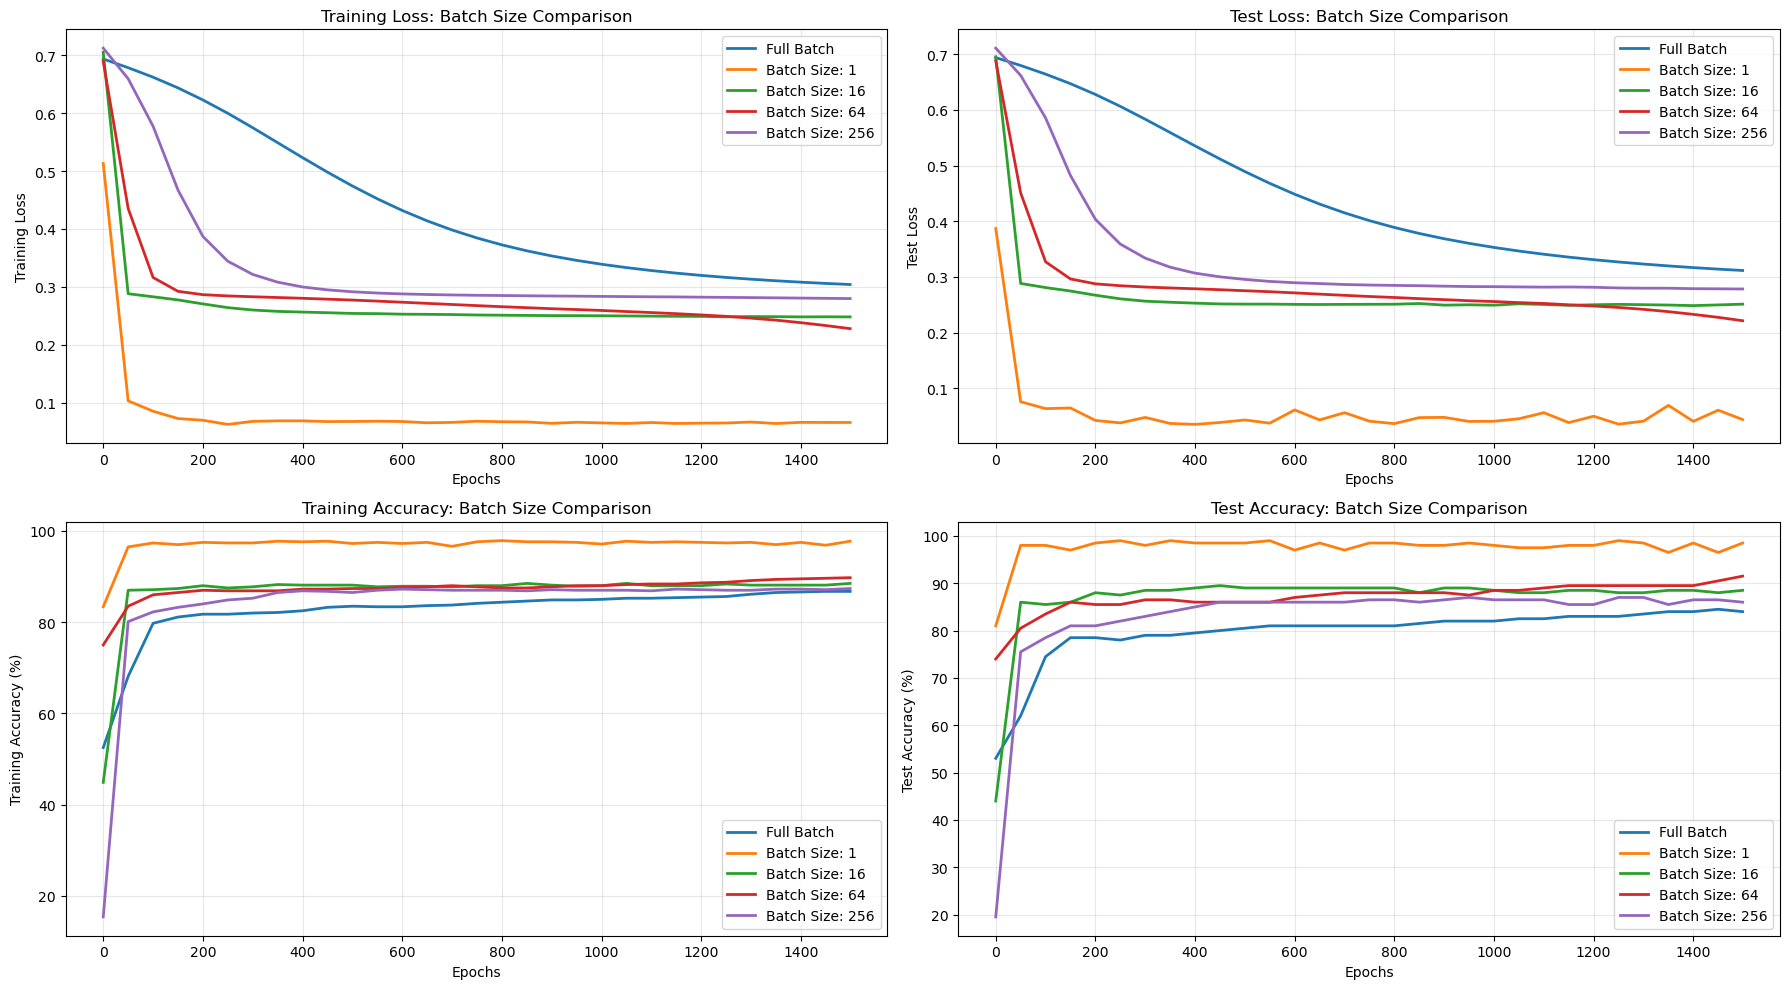

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from train_mlp_numpy import train

# Set default parameters
DNN_HIDDEN_UNITS = '20'
LEARNING_RATE = 1e-2
MAX_STEPS = 1500
EVAL_FREQ = 10


print("Generating moon dataset...")
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y_onehot, test_size=0.2, random_state=42
)

print(f"Dataset shapes:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

print("\nTraining MLP with default parameters (Batch Gradient Descent)...")
results = train(
    dnn_hidden_units=DNN_HIDDEN_UNITS,
    learning_rate=LEARNING_RATE, 
    max_steps=MAX_STEPS,
    eval_freq=EVAL_FREQ,
    batch_size='full',
    X_train=X_train,  
    y_train=y_train,  
    X_test=X_test,    
    y_test=y_test     
)

train_losses = results['train_losses']
test_losses = results['test_losses']
train_accuracies = results['train_accuracies']
test_accuracies = results['test_accuracies']
model = results['model']
steps = results['steps']
X_train_used = results['X_train']
y_train_used = results['y_train']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Training and Test Loss
ax1.plot(steps, train_losses, label='Training Loss', linewidth=2)
ax1.plot(steps, test_losses, label='Test Loss', linewidth=2)
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Test Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Training and Test Accuracy
ax2.plot(steps, train_accuracies, label='Training Accuracy', linewidth=2)
ax2.plot(steps, test_accuracies, label='Test Accuracy', linewidth=2)
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('Training and Test Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Simple data distribution visualization - Training vs Test Data
scatter_train = ax3.scatter(X_train_used[:, 0], X_train_used[:, 1], 
           c=np.argmax(y_train_used, axis=1), 
           cmap=plt.cm.RdYlBu, alpha=0.7, s=40, marker='o', label='Training')

scatter_test = ax3.scatter(X_test[:, 0], X_test[:, 1], 
           c=np.argmax(y_test, axis=1), 
           cmap=plt.cm.RdYlBu, alpha=0.9, s=60, marker='^', label='Test')

ax3.set_xlabel('Feature 1')
ax3.set_ylabel('Feature 2')
ax3.set_title('Dataset Distribution\n(Circles=Training, Triangles=Test)')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

X_all = np.vstack([X_train_used, X_test])
print(f"Dataset Composition:")
print(f"- Total: {len(X_all)} samples")
print(f"- Training: {X_train_used.shape[0]} samples ({X_train_used.shape[0]/len(X_all)*100:.1f}%)")
print(f"- Test: {X_test.shape[0]} samples ({X_test.shape[0]/len(X_all)*100:.1f}%)")

#final results
final_train_acc = train_accuracies[-1]
final_test_acc = test_accuracies[-1]
final_train_loss = train_losses[-1]
final_test_loss = test_losses[-1]

print("\n" + "="*50)
print("FINAL RESULTS (Batch Gradient Descent)")
print("="*50)
print(f"Final Training Accuracy: {final_train_acc:.2f}%")
print(f"Final Test Accuracy: {final_test_acc:.2f}%")
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Test Loss: {final_test_loss:.4f}")
print("="*50)

## 2. Batch Size Comparison Experiment
print("\n=== Experiment 2: Batch Gradient Descent vs Mini-Batch vs Stochastic Gradient Descent ===")

batch_sizes = ['full', 1, 16, 64, 256]
results_comparison = {}

for batch_size in batch_sizes:
    print(f"\n{'='*60}")
    print(f"Training with batch_size = {batch_size}")
    print(f"{'='*60}")
    # Use the same dataset for all experiments
    results_comparison[batch_size] = train(
        dnn_hidden_units=DNN_HIDDEN_UNITS,
        learning_rate=LEARNING_RATE,
        max_steps=MAX_STEPS,
        eval_freq=50,  #for cleaner plots
        batch_size=batch_size,
        X_train=X_train,  
        y_train=y_train,  
        X_test=X_test,    
        y_test=y_test     
    )

fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# Plot 1: Training Loss Comparison
ax = axes[0, 0]
for batch_size, result in results_comparison.items():
    label = 'Full Batch' if batch_size == 'full' else f'Batch Size: {batch_size}'
    ax.plot(result['steps'], result['train_losses'], label=label, linewidth=2)
ax.set_xlabel('Epochs')
ax.set_ylabel('Training Loss')
ax.set_title('Training Loss: Batch Size Comparison')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 2: Test Loss Comparison
ax = axes[0, 1]
for batch_size, result in results_comparison.items():
    label = 'Full Batch' if batch_size == 'full' else f'Batch Size: {batch_size}'
    ax.plot(result['steps'], result['test_losses'], label=label, linewidth=2)
ax.set_xlabel('Epochs')
ax.set_ylabel('Test Loss')
ax.set_title('Test Loss: Batch Size Comparison')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 3: Training Accuracy Comparison
ax = axes[1, 0]
for batch_size, result in results_comparison.items():
    label = 'Full Batch' if batch_size == 'full' else f'Batch Size: {batch_size}'
    ax.plot(result['steps'], result['train_accuracies'], label=label, linewidth=2)
ax.set_xlabel('Epochs')
ax.set_ylabel('Training Accuracy (%)')
ax.set_title('Training Accuracy: Batch Size Comparison')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 4: Test Accuracy Comparison
ax = axes[1, 1]
for batch_size, result in results_comparison.items():
    label = 'Full Batch' if batch_size == 'full' else f'Batch Size: {batch_size}'
    ax.plot(result['steps'], result['test_accuracies'], label=label, linewidth=2)
ax.set_xlabel('Epochs')
ax.set_ylabel('Test Accuracy (%)')
ax.set_title('Test Accuracy: Batch Size Comparison')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
